### Loading Training Data and Testing Data

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist

(trainingData,trainingLabel),(testingData,testingLabel) = mnist.load_data()

### Reshaping the dataset to fit in the input layer

Reshaping the 60000,28X28px image data to 60000, 28*28 = 784

In [58]:
trainingData = trainingData.reshape(60000,784)/255.0
testingData = testingData.reshape(10000,784)/255.0

Reshaping the Label (row to column)

In [59]:
trainingLabel = trainingLabel.reshape(60000,1)
testingLabel = testingLabel.reshape(10000,1)

### Encoding the labels

In [60]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)

trainLabelEn = encoder.fit_transform(trainingLabel)
testLavelEn = encoder.fit_transform(testingLabel)


### Defining Numer of neurons each layer

In [61]:
inputLyr = 784
hiddenLyr1 = 256
hiddenLyr2 = 128
hiddenLyr3 = 64
outputLyr = 10

### Initialize weights and biases

In [62]:
np.random.seed(42)
w1 = np.random.randn(inputLyr,hiddenLyr1)*0.01
b1 = np.zeros((1,hiddenLyr1))

w2 = np.random.randn(hiddenLyr1,hiddenLyr2)*0.01
b2 = np.zeros((1,hiddenLyr2))

w3 = np.random.rand(hiddenLyr2,hiddenLyr3)*0.01
b3 = np.zeros((1,hiddenLyr3))

w4 = np.random.randn(hiddenLyr3,outputLyr)*0.01
b4 = np.zeros((1,outputLyr))



### Activesion Functions

In [63]:
def relu(x):
    return np.maximum(0,x)

def relu_derivative(x):
    return (x > 0).astype(float)

def softmax(z):
    exp = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp / np.sum(exp, axis=1, keepdims=True)

def loss(actualLabel,pradictedLabel):
    return -np.mean(np.sum(actualLabel*np.log(pradictedLabel + 1e-8), axis=1))

def accu():
    z1_test = np.dot(testingData, w1) + b1
    r1_test = relu(z1_test)
       
    z2_test = np.dot(r1_test, w2) + b2
    r2_test = relu(z2_test)
        
    z3_test = np.dot(r2_test,w3) + b3
    r3_test = relu(z3_test)
        
    z4_test = np.dot(r3_test,w4) + b4
    r4_test = softmax(z4_test)
    # Predictions and accuracy
    predictions = np.argmax(r4_test, axis=1)
    accuracy = np.mean(predictions == testingLabel.flatten())
    
    return accuracy * 100


### Hyperparameters

In [64]:
learnRate = 0.1
epochNum = 30
batchSize = 300
batchesNum = trainingData.shape[0] // batchSize

### Accuracy and loss record

In [65]:
accuRecord = []
lossRecord = []

### Training

In [66]:
print("Training Start:")
for epoch in range(epochNum):
    
    totalLoss = 0

    reOrder = np.random.permutation(trainingData.shape[0])
    trainingDataReorder = trainingData[reOrder]
    trainingLabelEnReorder = trainLabelEn[reOrder]
    
    for i in range(batchesNum):
        start = i * batchSize
        end = start + batchSize
        batchData = trainingDataReorder[start:end]
        batchLabel = trainingLabelEnReorder[start:end]

        z1 = np.dot(batchData, w1) + b1
        r1 = relu(z1)
       
        z2 = np.dot(r1, w2) + b2
        r2 = relu(z2)
        
        z3 = np.dot(r2,w3) + b3
        r3 = relu(z3)
        
        z4 = np.dot(r3,w4) + b4
        r4 = softmax(z4)

        batchLoss = loss(batchLabel, r4)
        totalLoss += batchLoss

        dz4 = r4 - batchLabel
        dw4 = np.dot(r3.T, dz4) / batchSize
        db4 = np.mean(dz4, axis= 0, keepdims= True)

        da3 = np.dot(dz4,w4.T)
        dz3 = da3 * relu_derivative(z3) 
        dw3 = np.dot(r2.T, dz3) / batchSize
        db3 = np.mean(dz3, axis=0, keepdims=True)

        da2 = np.dot(dz3, w3.T)
        dz2 = da2 * relu_derivative(z2)
        dw2 = np.dot(r1.T,dz2) / batchSize
        db2 = np.mean(dz2, axis=0, keepdims=True)

        da1 = np.dot(dz2,w2.T)
        dz1 = da1 * relu_derivative(z1)
        dw1 = np.dot(batchData.T,dz1)/ batchSize
        db1 = np.mean(dz1,axis=0, keepdims=True)
        
       
        w4 -= learnRate * dw4
        b4 -= learnRate * db4

        w3 -= learnRate * dw3
        b3 -= learnRate * db3

        w2 -= learnRate * dw2
        b2 -= learnRate * db2

        w1 -= learnRate * dw1
        b1 -= learnRate * db1

    avg_loss = totalLoss / batchesNum
    accuracy = accu()
    print(f"epoch no: {epoch+1} and Loss: {avg_loss:.3f}  Accuracy: {accuracy:.2f}%")  
    accuRecord.append(accuracy)
    lossRecord.append(avg_loss)

print("Training End")

Training Start:
epoch no: 1 and Loss: 2.302  Accuracy: 11.35%
epoch no: 2 and Loss: 2.301  Accuracy: 11.35%
epoch no: 3 and Loss: 2.301  Accuracy: 11.35%
epoch no: 4 and Loss: 2.298  Accuracy: 22.15%
epoch no: 5 and Loss: 2.070  Accuracy: 25.79%
epoch no: 6 and Loss: 1.779  Accuracy: 30.07%
epoch no: 7 and Loss: 1.643  Accuracy: 36.31%
epoch no: 8 and Loss: 1.532  Accuracy: 40.72%
epoch no: 9 and Loss: 1.429  Accuracy: 41.24%
epoch no: 10 and Loss: 1.298  Accuracy: 49.88%
epoch no: 11 and Loss: 1.094  Accuracy: 58.92%
epoch no: 12 and Loss: 0.911  Accuracy: 66.63%
epoch no: 13 and Loss: 0.725  Accuracy: 81.32%
epoch no: 14 and Loss: 0.522  Accuracy: 89.78%
epoch no: 15 and Loss: 0.359  Accuracy: 93.74%
epoch no: 16 and Loss: 0.241  Accuracy: 94.60%
epoch no: 17 and Loss: 0.186  Accuracy: 95.44%
epoch no: 18 and Loss: 0.147  Accuracy: 95.88%
epoch no: 19 and Loss: 0.126  Accuracy: 95.85%
epoch no: 20 and Loss: 0.113  Accuracy: 96.23%
epoch no: 21 and Loss: 0.097  Accuracy: 96.48%
epoch 

### Ploting (Accuracy & Loss) vs (Epoch)

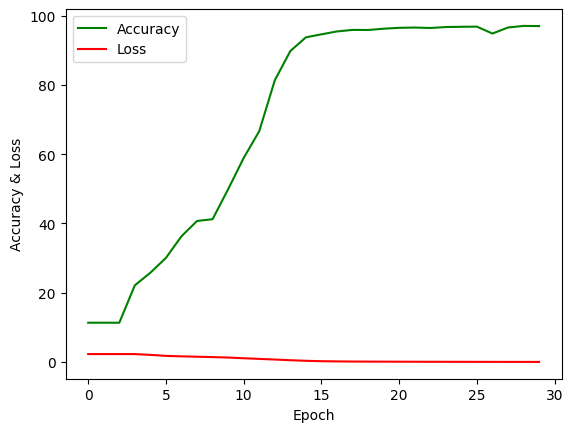

In [67]:

x = np.arange(0,epochNum,1)
y = accuRecord
z= lossRecord 

plt.plot(x,y,'g')
plt.plot(x,z,'r')
plt.xlabel("Epoch")
plt.ylabel("Accuracy & Loss")
plt.legend(["Accuracy","Loss"])
plt.show()
